In this simple example, we look at how random forest tree works. We have collected data, that form 2 groups that seem to partially overlap. We use random forest to try to find the 'real' boundary between these two groups.

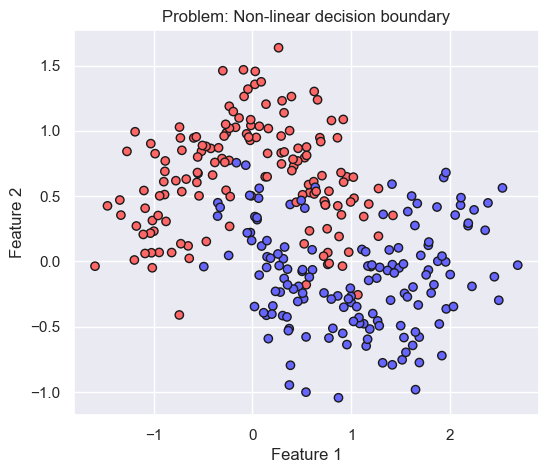

In [4]:
# Let's start by generating two groups of points with an unclear boundary
# STEP 1: Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()

# STEP 2: Generate a problem (nonlinear dataset)
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#ff6666', '#6666ff']), edgecolor='k')
plt.title("Problem: Non-linear decision boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



In [5]:
# What if we tried to train a simple tree? The training would look like:
# (le't scall this STEP 3: Visualize how a single tree works)
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

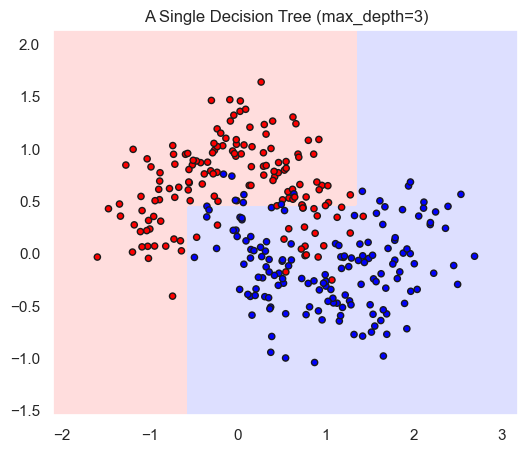

In [6]:
# Our cloud does not have many points, so a simple tree may be good enough.
# Let's look at how our single tree would split the two groups of points

def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFDDDD', '#DDDFFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_title(title)

fig, ax = plt.subplots(figsize=(6, 5))
plot_decision_boundary(tree, X, y, ax,  "A Single Decision Tree (max_depth=3)")
plt.show()

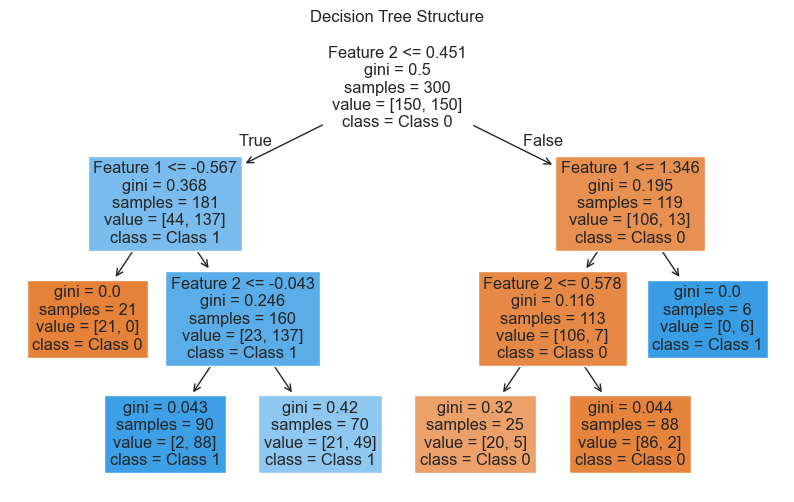

In [7]:
# Not bad for a single tree, but not great either. Let's try to do better
# and build a full forest, with many trees, in the hope of refining that border.
# The structure of the forest would look like this:


plt.figure(figsize=(10, 6))
plot_tree(tree, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Structure")
plt.show()

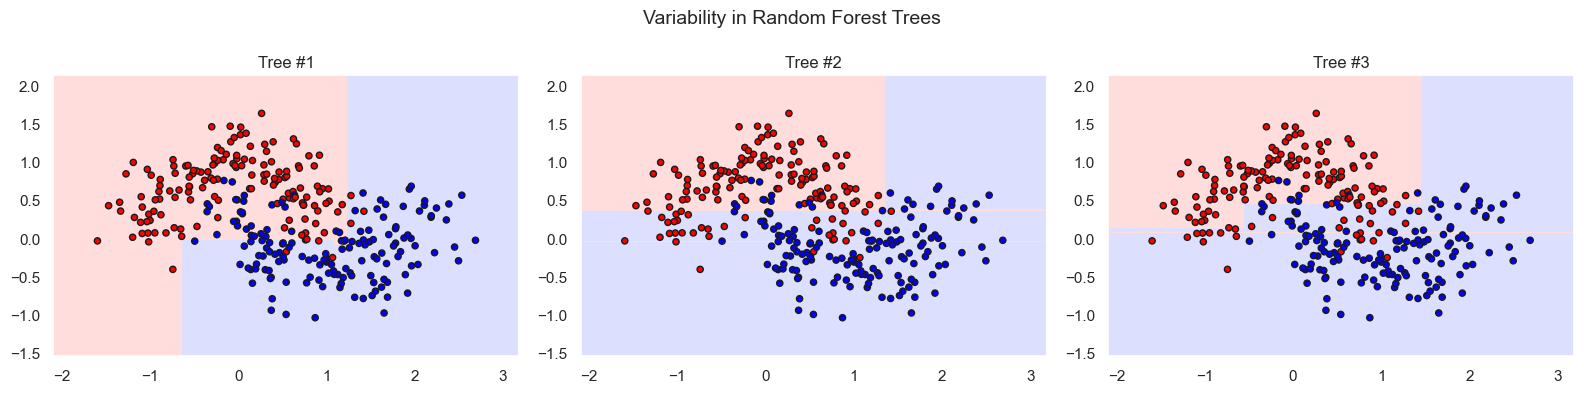

In [8]:


# Le'ts build a forest with 100 trees, and look at their individual border decision
forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
forest.fit(X, y)

# Show decision boundaries of 3 trees
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, ax in enumerate(axes):
    plot_decision_boundary(forest.estimators_[i], X, y, ax, f"Tree #{i+1}")
plt.suptitle("Variability in Random Forest Trees", fontsize=14)
plt.tight_layout()
plt.show()


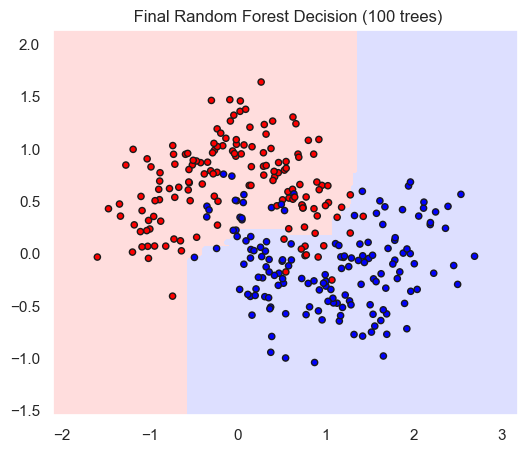

In [9]:
# They have slightly different borders, so if we combine them,
# we should get a better resul than a single tree
fig, ax = plt.subplots(figsize=(6, 5))
plot_decision_boundary(forest, X, y, ax, " Final Random Forest Decision (100 trees)")
plt.show()

In [10]:
# Of course, our example is simple, so a single tree was aloready 'not bad'.
# 100 trees improve the accuracy visually, but statistically only marginally.
# In real life and large datasets, a single tree accuracy is usually lower,
# and increases a lot with many trees.
tree_pred = tree.predict(X)
forest_pred = forest.predict(X)

print(" Accuracy:")
print(f"Single Tree:      {accuracy_score(y, tree_pred):.3f}")
print(f"Random Forest:    {accuracy_score(y, forest_pred):.3f}")

 Accuracy:
Single Tree:      0.900
Random Forest:    0.903
